# Making sense of data through  advance visualization

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.tools.rplot as rplot

## Controlling the line properties of a chart

Let create a simple line chart

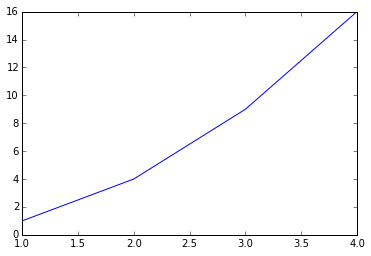

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

Increasing the line width

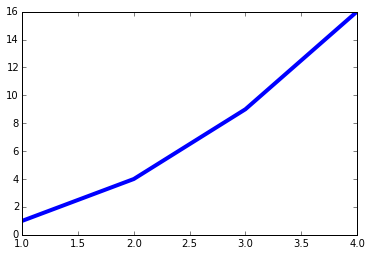

In [9]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], linewidth=4.0)
plt.show()

Setting the dashed lines

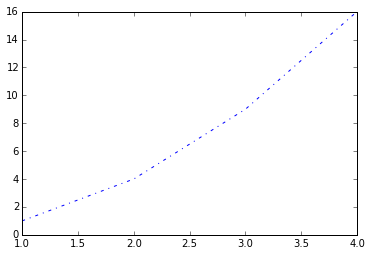

In [15]:
line, = plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
line.set_linestyle('-.')  
plt.show()


setting the color and width of the line

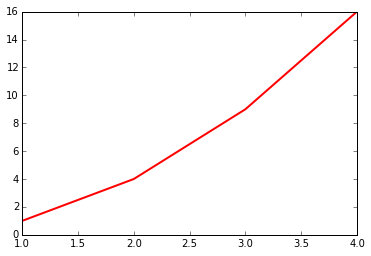

In [11]:
line, = plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.setp(line, color='r', linewidth=2.0)  
plt.show()

## Plotting multiple plots

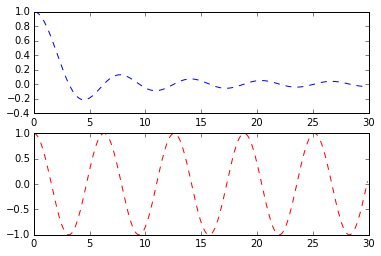

In [12]:
p1 = np.arange(0.0, 30.0, 0.1)

plt.subplot(211)
plt.plot(p1, np.sin(p1)/p1, 'b--')

plt.subplot(212)
plt.plot(p1, np.cos(p1), 'r--')
plt.show()

## Playing with text

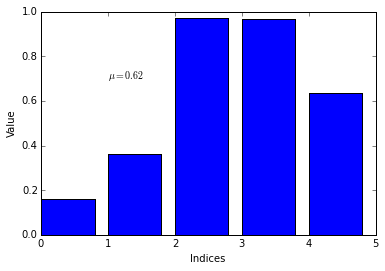

In [14]:
n = np.random.random_sample((5,))

plt.bar(np.arange(len(n)), n)
plt.xlabel('Indices')
plt.ylabel('Value')
plt.text(1, .7, r'$\mu=' + str(np.round(np.mean(n), 2)) + ' $')

plt.show()

Annotating the text

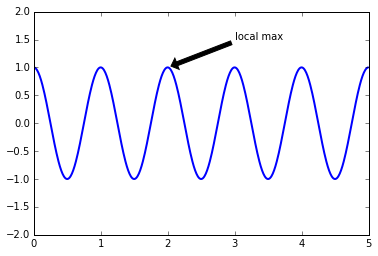

In [3]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

## Styling your plots 

Creating a simple line chart with the ggplot style

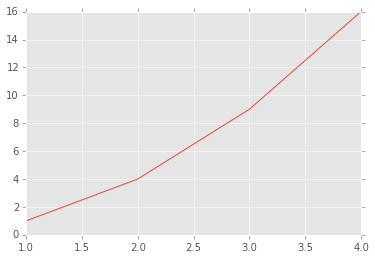

In [5]:
plt.style.use('ggplot')
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

Using the fivethirtyeight.com style

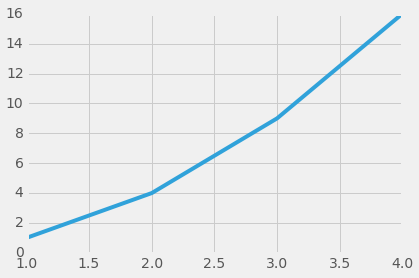

In [7]:
plt.style.use('fivethirtyeight')
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

Temporary styling

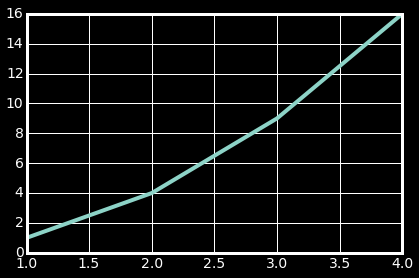

In [8]:
with plt.style.context(('dark_background')):
     plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

## Box plots

Lets add some data and plot the box plot

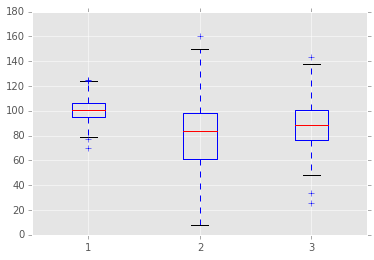

In [6]:
## Creating some data
np.random.seed(10)
box_data_1 = np.random.normal(100, 10, 200)
box_data_2 = np.random.normal(80, 30, 200)
box_data_3 = np.random.normal(90, 20, 200)

## Combining the different data in a list
data_to_plot = [box_data_1, box_data_2, box_data_3]

# Create the boxplot
bp = plt.boxplot(data_to_plot)

If you want to change the color of the boxes and customize the whiskers. It can be done using the following code

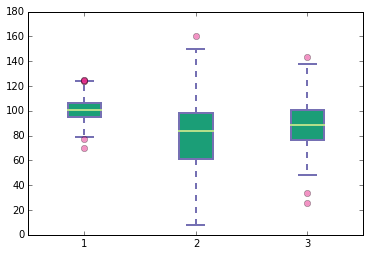

In [3]:
## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = plt.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

## Heat Maps

Adding some data

In [20]:
# Generate Data
data = np.random.rand(10,6)
rows = list('ZYXWVUTSRQ')
columns = list('ABCDEF')

We'll use the pcolor() which is similar to heatmaps.2() in R

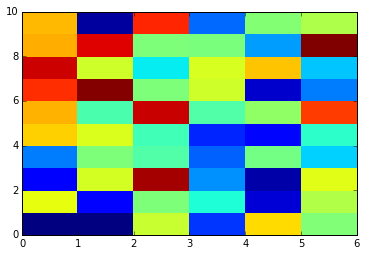

In [25]:
plt.pcolor(data)
plt.show()

We'll add the row and column labels to the heat map

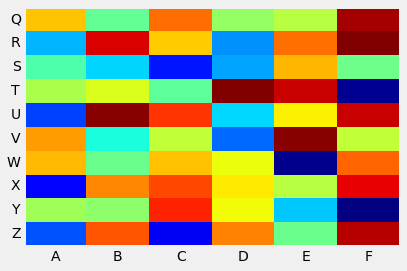

In [14]:
# Add Row/Column Labels
plt.pcolor(data)
plt.xticks(np.arange(0,6)+0.5,columns)
plt.yticks(np.arange(0,10)+0.5,rows)
plt.show()
plt.close()

Now, we'll change the color of the heatmap

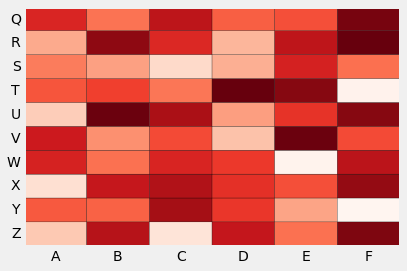

In [15]:
# Change color map
plt.pcolor(data,cmap=plt.cm.Reds,edgecolors='k')
plt.xticks(np.arange(0,6)+0.5,columns)
plt.yticks(np.arange(0,10)+0.5,rows)
plt.show()

Now, if you have a large amount of values that needs to be visualized using the heatmap. We can bin it and then visualize it using the following code

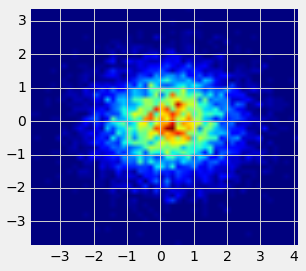

In [19]:
    # Generate some test data
    x = np.random.randn(8873)
    y = np.random.randn(8873)
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    plt.clf()
    plt.imshow(heatmap, extent=extent)
    plt.show()

# Scatter plot with Histogram

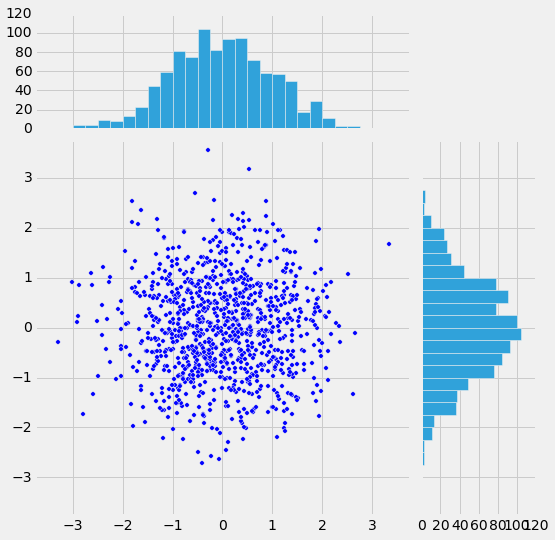

In [25]:
from matplotlib.ticker import NullFormatter


# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)


nullfmt   = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left+width+0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8,8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max( [np.max(np.fabs(x)), np.max(np.fabs(y))] )
lim = ( int(xymax/binwidth) + 1) * binwidth


axScatter.set_xlim( (-lim, lim) )
axScatter.set_ylim( (-lim, lim) )

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

plt.show()

## Scatter Matrix

The following is an example of a scatter plot matrix 

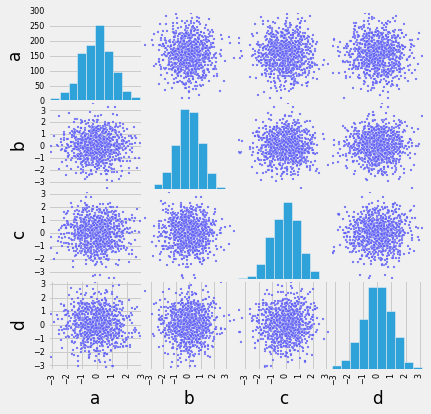

In [19]:

df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

spm = pd.tools.plotting.scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='hist')

Creating the scatter plot with the Kernal Density Estimation

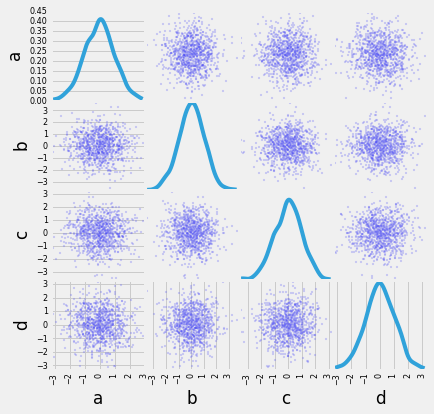

In [20]:
spm = pd.tools.plotting.scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

## Area Plot

The area plot below is basically stacked across the instances

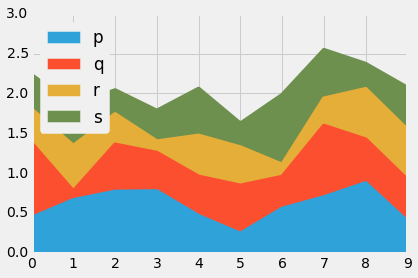

In [26]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['p', 'q', 'r', 's'])

df.plot(kind='area');

To create an unstacked Area plot

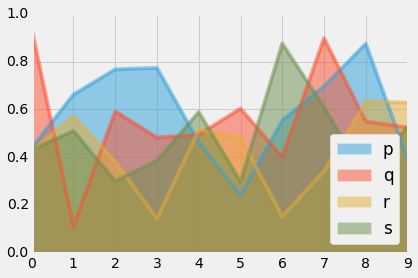

In [27]:
df.plot(kind='area', stacked=False);

# Bubble Chart

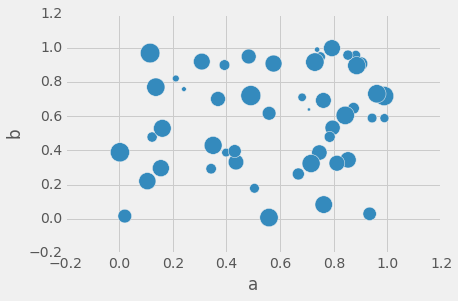

In [8]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot(kind='scatter', x='a', y='b', s=df['c']*400);

## Hexagon Bin Plot

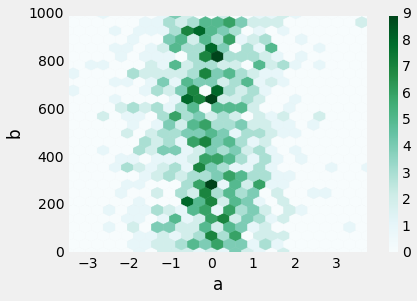

In [31]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

df['b'] = df['b'] + np.arange(1000)

df.plot(kind='hexbin', x='a', y='b', gridsize=25)

## Trellis Plots

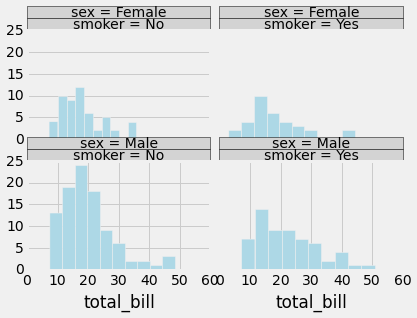

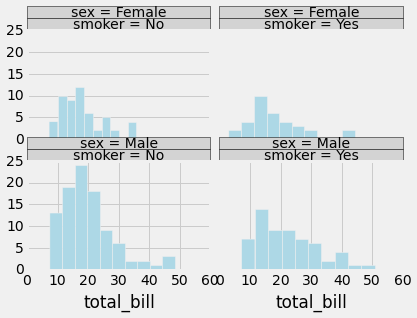

In [3]:
tips_data = pd.read_csv('Data/tips.csv')

plt.figure()

plot = rplot.RPlot(tips_data, x='total_bill', y='tip')

plot.add(rplot.TrellisGrid(['sex', 'smoker']))

plot.add(rplot.GeomHistogram())

plot.render(plt.gcf())

We can replot this trellis plot with Kernal Density Estimate

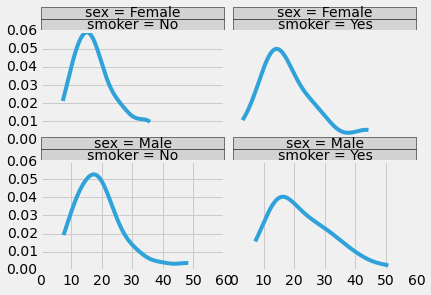

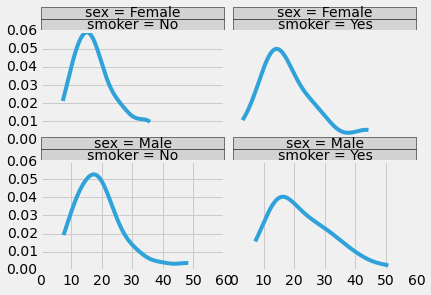

In [4]:
plt.figure()
plot = rplot.RPlot(tips_data, x='total_bill', y='tip')
plot.add(rplot.TrellisGrid(['sex', 'smoker']))
plot.add(rplot.GeomDensity())
plot.render(plt.gcf())

Trellis plot with scatter and poly fit line

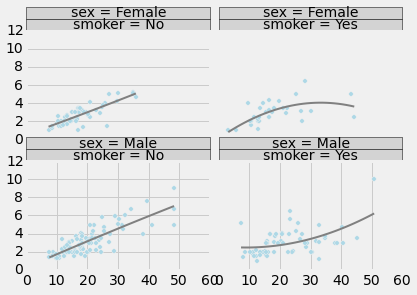

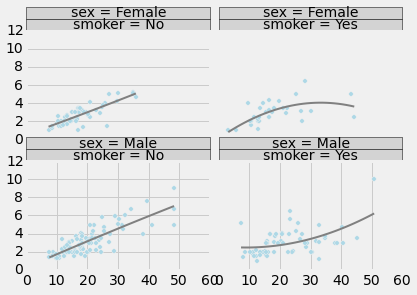

In [8]:
plt.figure()
plot = rplot.RPlot(tips_data, x='total_bill', y='tip')
plot.add(rplot.TrellisGrid(['sex', 'smoker']))
plot.add(rplot.GeomScatter())
plot.add(rplot.GeomPolyFit(degree=2))
plot.render(plt.gcf())

Trellis Chart with 2D kernal density plot 

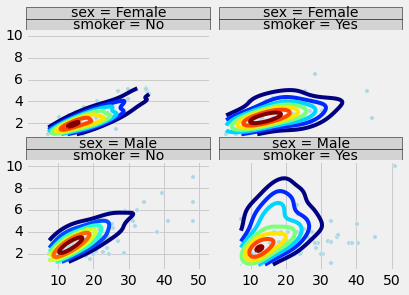

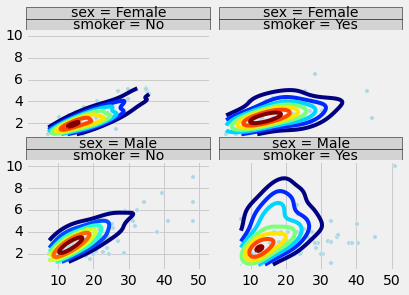

In [9]:
plt.figure()
plot = rplot.RPlot(tips_data, x='total_bill', y='tip')
plot.add(rplot.TrellisGrid(['sex', 'smoker']))
plot.add(rplot.GeomScatter())
plot.add(rplot.GeomDensity2D())
plot.render(plt.gcf())

## 3D Plot of a Surface

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

Let's adjust the view using the view_int. The following is the view at 0 elevation and 0 degree angle.

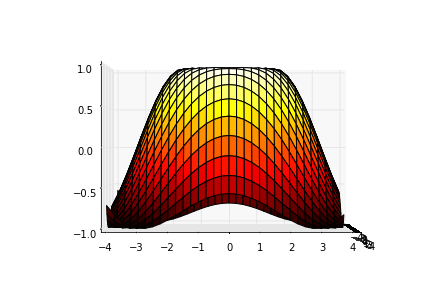

In [53]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=0., azim=0)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

The following is the view at 50 elevation.

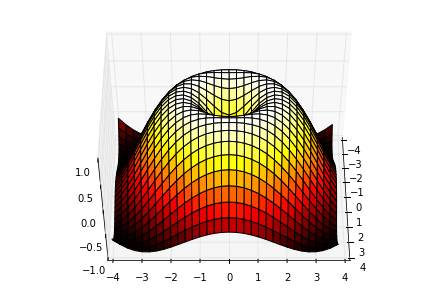

In [55]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=50., azim=0)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

The following is the view at 50 elevation and 30 degrees angle.

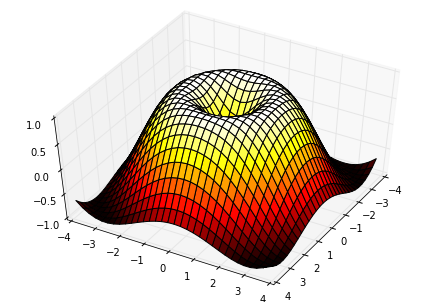

In [56]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=50., azim=30)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')